In [1]:
%matplotlib inline

In [2]:
!curl -o insurance.csv https://raw.githubusercontent.com/Arun103k/Machine-Learning-with-R-datasets/master/insurance.csv
insurance.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 75 54288   75 41130    0     0  27975      0  0:00:01  0:00:01 --:--:-- 28036
100 54288  100 54288    0     0  35264      0  0:00:01  0:00:01 --:--:-- 35320


NameError: name 'insurance' is not defined

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


In [4]:
!pip install pandas

In [5]:
!pip install numpy

In [6]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.1/9.8 MB 465.5 kB/s eta 0:00:21
   ---------------------------------------- 0.1/9.8 MB 573.4 kB/s eta 0:00:17
    --------------------------------------- 0.1/9.8 MB 652.5 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.8 MB 737.3 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.8 MB 689.9 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.8 MB 714.4 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.8 MB 811.9 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.8 MB 897.8 kB/s eta 0:00:11
   - -------------------------------------- 0.5/9.8 MB 950.1 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.8 MB 981.7 kB/s eta 0:00:10
   -

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [8]:
from sklearn.prepocessing import LabelEncoder
import copy

ModuleNotFoundError: No module named 'sklearn.prepocessing'

In [9]:
!pip install scikit-learn

In [10]:
!where sklearn.preprocessing

INFO: Could not find files for the given pattern(s).


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
import copy

In [13]:
sns.set() 

In [14]:
df = pd.read_csv('insurance.csv') # read the data as a data frame

In [15]:
df.head() # checkinf the head of the data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.describe().T # five points summary of the continous attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [18]:
df['sex'].value_counts() # No of male and female in the datasets

sex
male      676
female    662
Name: count, dtype: int64

In [19]:
df.['childrean'].value_counts().sort_values() # Distribution of the number of children per person

SyntaxError: invalid syntax (777874256.py, line 1)

In [20]:
df.['children'].value_counts().sort_values() # Distribution of the number of children per person

SyntaxError: invalid syntax (3819725251.py, line 1)

In [21]:
df['children'].value_counts().sort_values() # Distribution of the number of children per person

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [22]:
df['age'].value_counts().sort_values() # Age distribution

age
64    22
61    23
62    23
63    23
60    23
39    25
35    25
38    25
36    25
58    25
59    25
37    25
32    26
33    26
55    26
34    26
56    26
57    26
41    27
40    27
31    27
44    27
42    27
30    27
43    27
29    27
49    28
54    28
53    28
21    28
22    28
24    28
25    28
28    28
27    28
23    28
26    28
52    29
48    29
20    29
45    29
46    29
47    29
51    29
50    29
19    68
18    69
Name: count, dtype: int64

In [23]:
clean_data = {'sex':{'male':0, 'female':1},
              'smoker':{'no':0, 'yes':1},
              'region':{'northwest':0, 'norteast':1, 'southeast':2, 'southwest':3}
             }
data_copy = df.copy()
data_copy.replace(clean_data, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16192\723625727.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(clean_data, inplace = True)


In [24]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [25]:
# Pairwise correlation heatmap
corr = data_copy.corr()
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corr, cmap = 'BuPu', annot=True,fmt = '.2f', ax = ax)
plt.title('Dependencies of Charges')
plt.show()

ValueError: could not convert string to float: 'northeast'

In [26]:
clean_data = {'sex':{'male':0, 'female':1},
              'smoker':{'no':0, 'yes':1},
              'region':{'northwest':0, 'northeast':1, 'southeast':2, 'southwest':3}
             }
data_copy = df.copy()
data_copy.replace(clean_data, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16192\1010105666.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(clean_data, inplace = True)


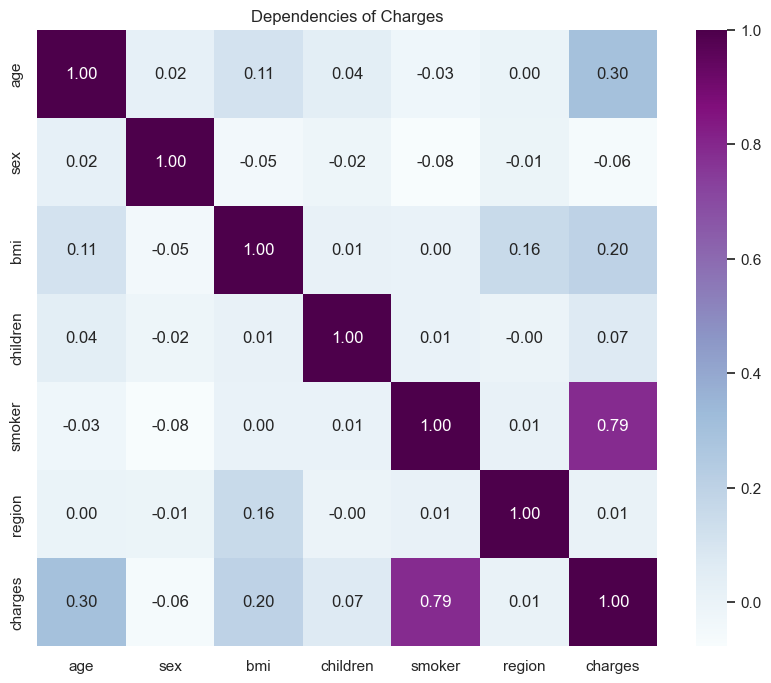

In [27]:
# Pairwise correlation heatmap
corr = data_copy.corr()
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corr, cmap = 'BuPu', annot=True,fmt = '.2f', ax = ax)
plt.title('Dependencies of Charges')
plt.show()

In [28]:
print(data_copy['sex'].value_counts().sort_values())
print(data_copy['smoker'].value_counts().sort_values())
print(data_copy['region'].value_counts().sort_values())

sex
1    662
0    676
Name: count, dtype: int64
smoker
1     274
0    1064
Name: count, dtype: int64
region
1    324
3    325
0    325
2    364
Name: count, dtype: int64


In [29]:
# First we analyze the distibution of charges
sns.set(style = 'whiteguard')
f, ax = plt.subplot(1,1, figsize = (12, 8))
ax = sns.displot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

In [30]:
# First we analyze the distibution of charges
sns.set(style = 'darkgrid')
f, ax = plt.subplot(1,1, figsize = (12, 8))
ax = sns.displot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [31]:
# First we analyze the distibution of charges
sns.set(style = 'darkgrid')
f, ax = plt.subplot(1, figsize = (12, 8))
ax = sns.displot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

ValueError: Single argument to subplot must be a three-digit integer, not 1

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Charges')

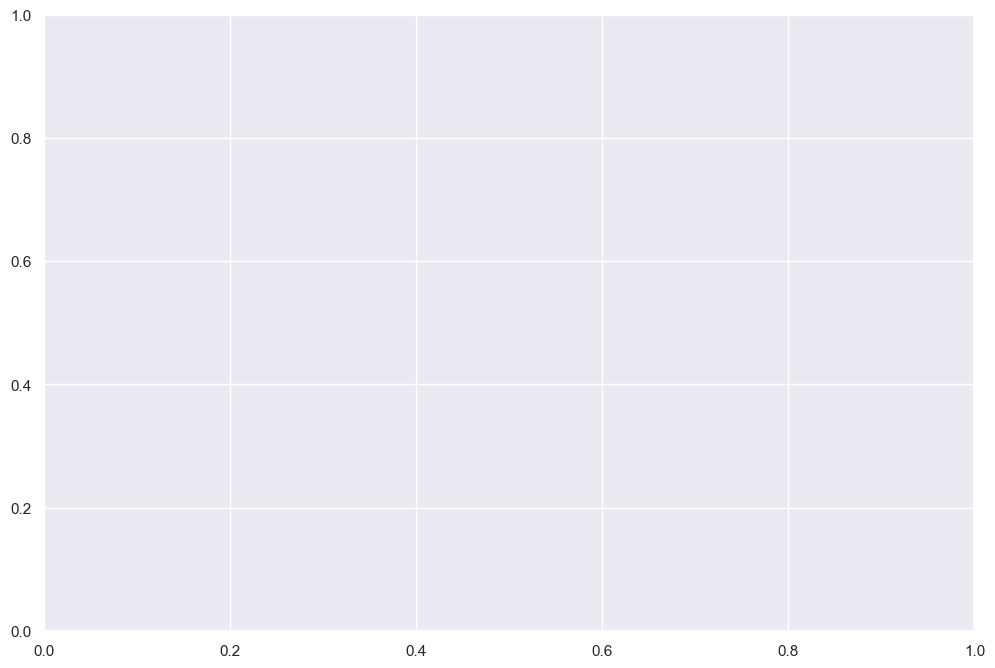

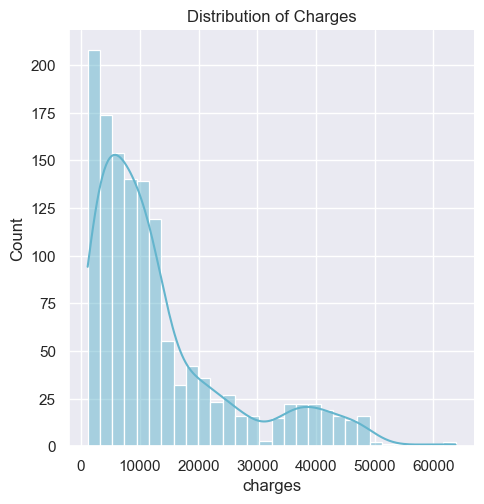

In [32]:
# First we analyze the distibution of charges
sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1, figsize = (12, 8))
ax = sns.displot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

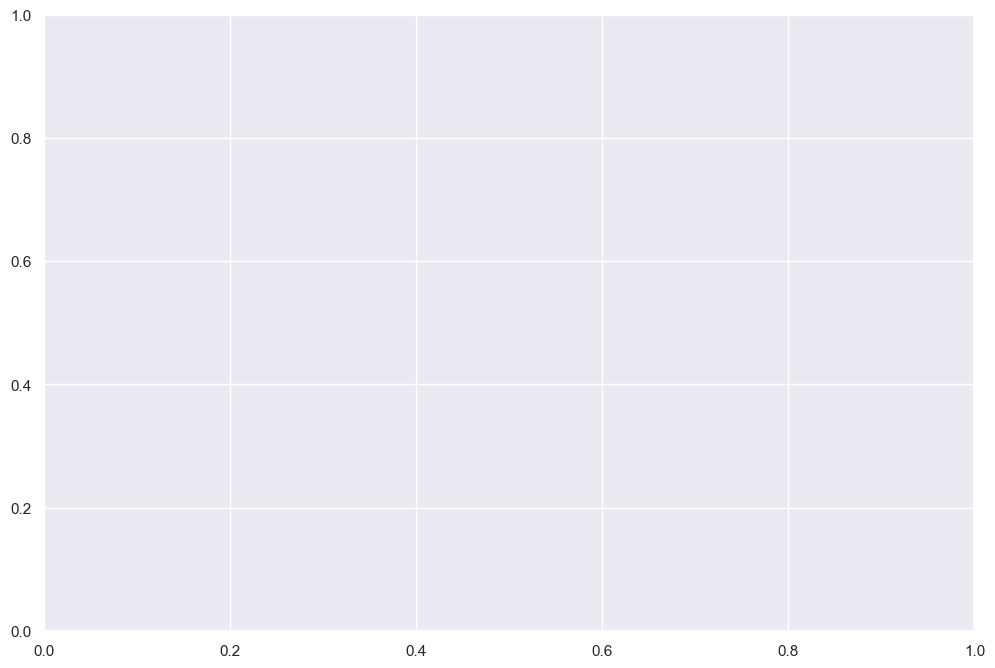

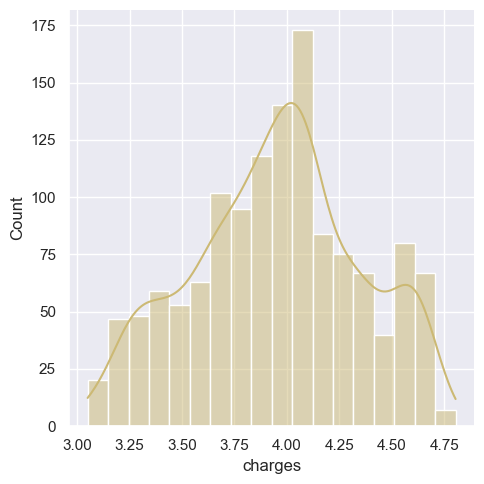

In [33]:
# The distribution is right skewed. To make it closer to normal we can log transform the variable
f, ax = plt.subplots(1,1, figsize = (12, 8))
ax = sns.displot(np.log10(df['charges']), kde = True, color = 'y') # Log with base 10

AttributeError: Rectangle.set() got an unexpected keyword argument 'aplha'

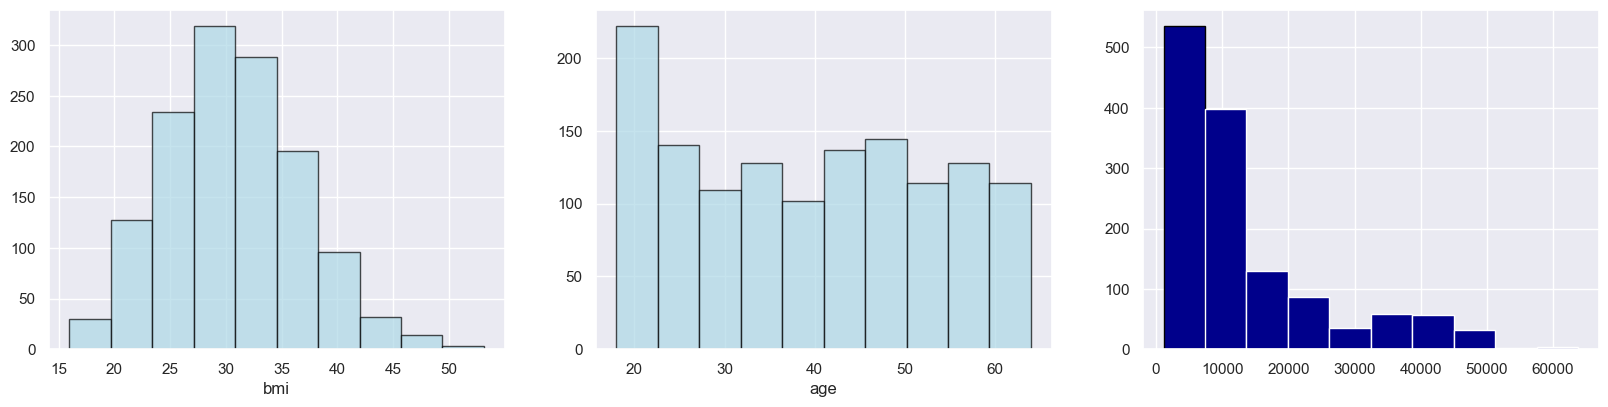

In [35]:
# plots to see the distribution of the continous feature individually
plt.figure(figsize = (20, 15))
plt.subplot(3, 3, 1)
plt.hist(df.bmi, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3, 3, 2)
plt.hist(df.age, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3, 3, 3)
plt.hist(df.charges, color = 'darkblue', edgecolor  ='black', aplha = 0.7)
plt.xlabel('charges')

plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'aplha'

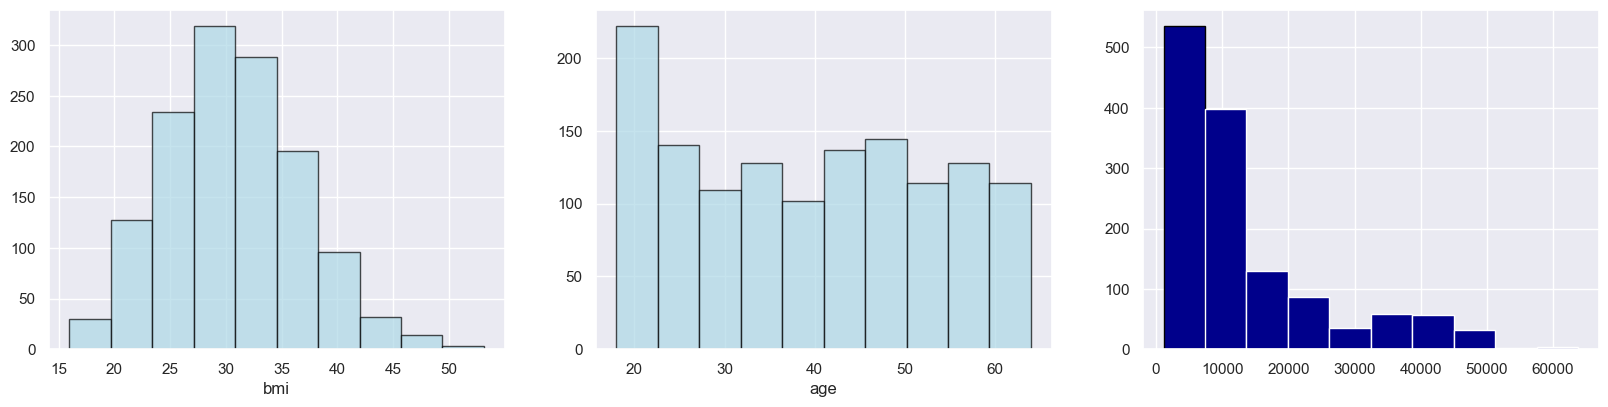

In [36]:
# plots to see the distribution of the continous feature individually
plt.figure(figsize = (20, 15))
plt.subplot(3, 3, 1)
plt.hist(df.bmi, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3, 3, 2)
plt.hist(df.age, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3, 3, 3)
plt.hist(df.charges, color = 'darkblue', edgecolor  ='black', aplha = 0.7)
plt.xlabel('charges')

plt.show()

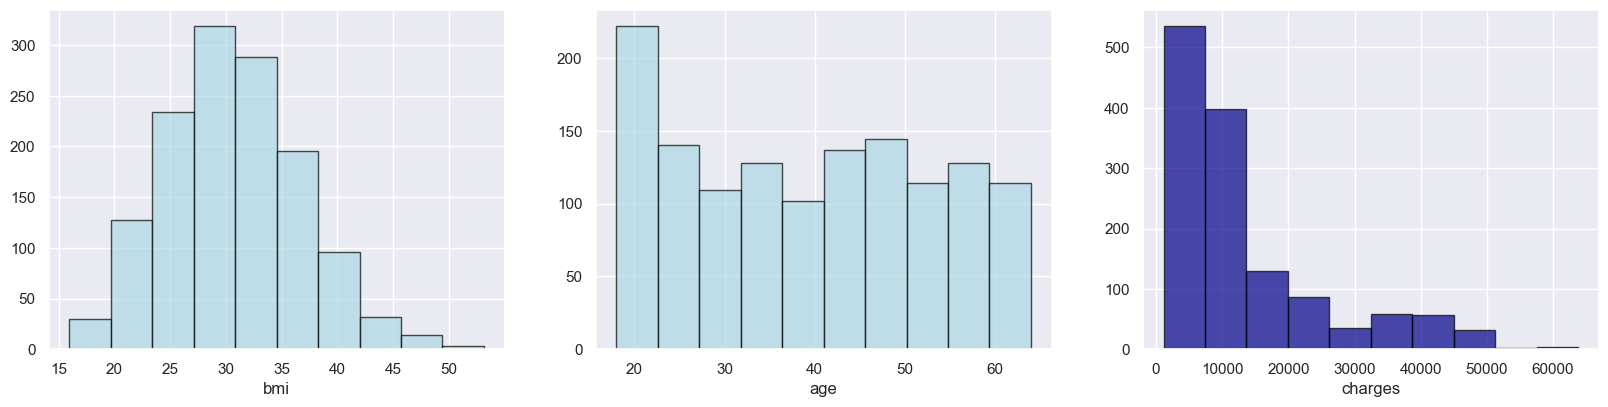

In [37]:
# plots to see the distribution of the continous feature individually
plt.figure(figsize = (20, 15))
plt.subplot(3, 3, 1)
plt.hist(df.bmi, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3, 3, 2)
plt.hist(df.age, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3, 3, 3)
plt.hist(df.charges, color = 'darkblue', edgecolor  ='black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

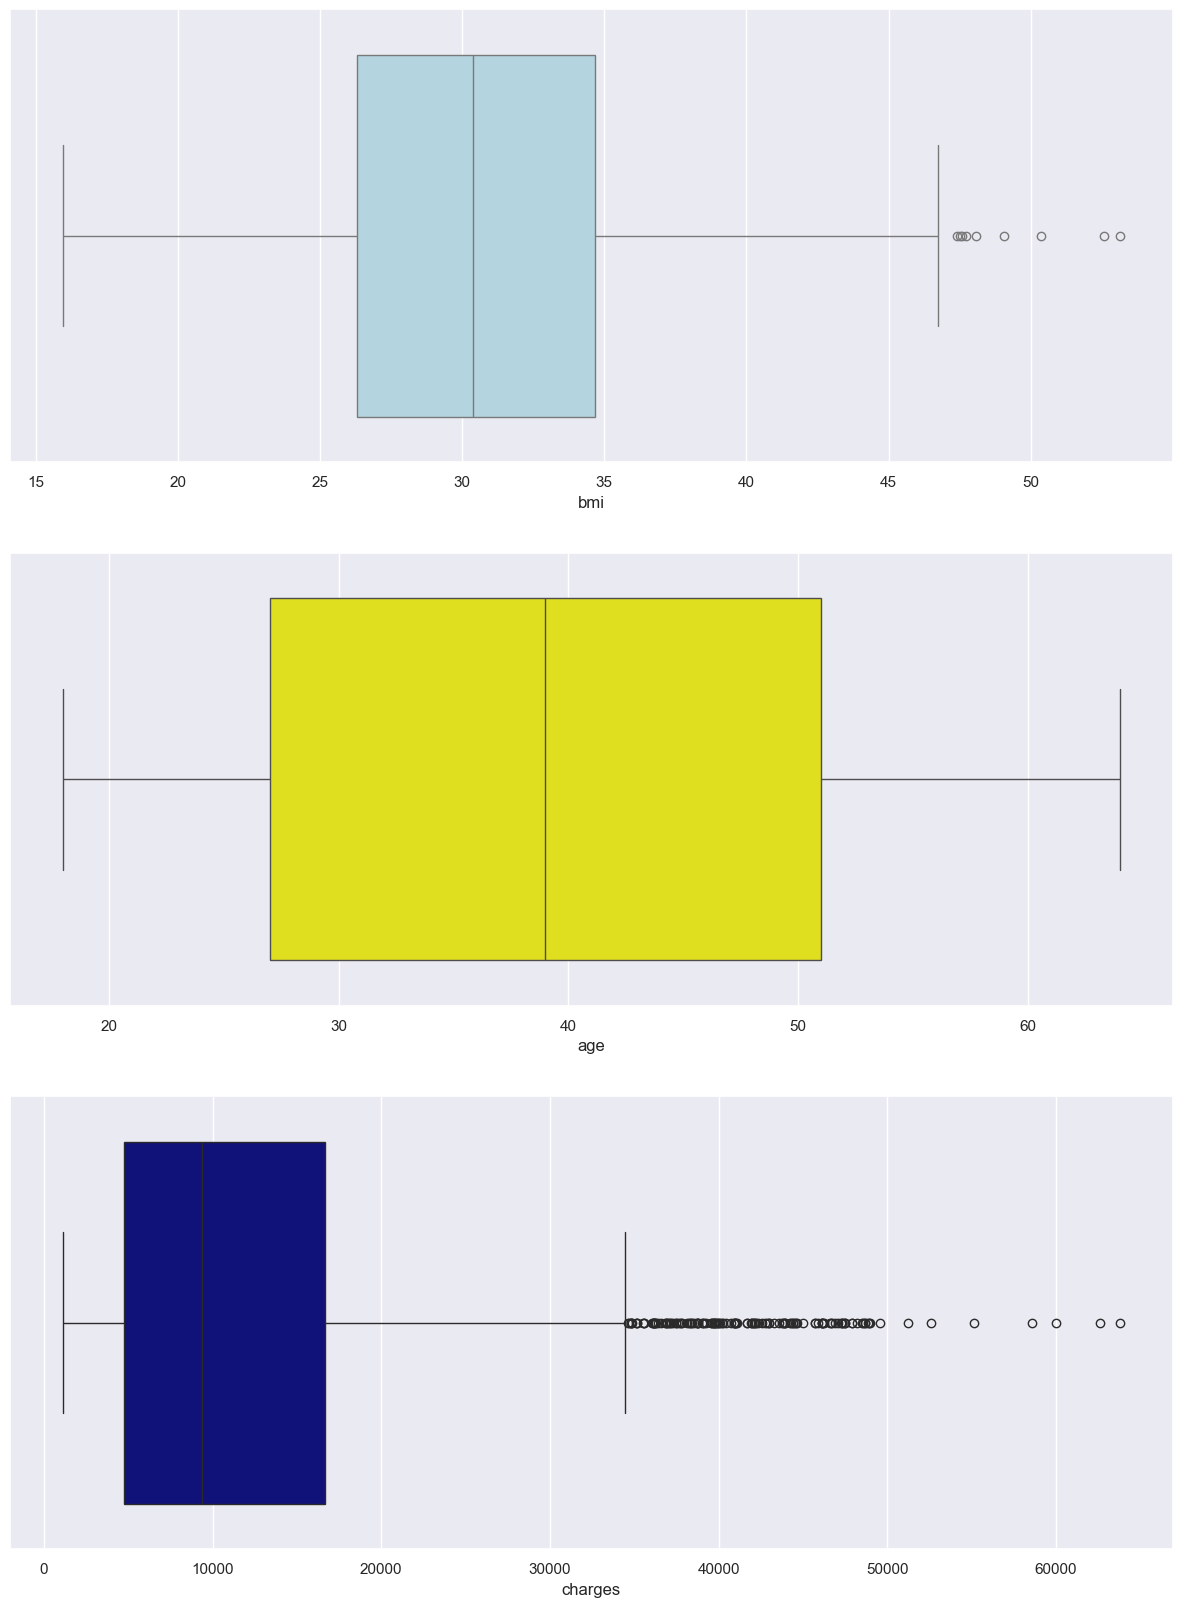

In [38]:
# bmi looks quietly distributed

# Age seems to be distributed uniformly

# As seen in the previous step, charges are highly skewed

plt.figure(figsize = (15, 20))
plt.subplot(3, 1, 1)
sns.boxplot(x = df.bmi, color = 'lightblue')

plt.subplot(3, 1, 2)
sns.boxplot(x = df.age, color = 'yellow')

plt.subplot(3, 1, 3)
sns.boxplot(x = df.charges, color = 'darkblue')

plt.show()

In [39]:
# Bmi has a few extreme values, charges as it highly skewed, there are quiet a lot of extreme values
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1: .3f} and Kurtosis {2: .3f}'
          format(col, data_copy[col].skew(), data_copy[col].kurt())

SyntaxError: '(' was never closed (4053466751.py, line 5)

In [40]:
# Bmi has a few extreme values, charges as it highly skewed, there are quiet a lot of extreme values
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1: .3f} and Kurtosis {2: .3f}'
          format(col, data_copy[col].skew(), data_copy[col].kurt()))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1550878531.py, line 5)

In [41]:
# Bmi has a few extreme values, charges as it highly skewed, there are quiet a lot of extreme values
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1: .3f} and Kurtosis {2: .3f}'.
          format(col, data_copy[col].skew(), data_copy[col].kurt())

SyntaxError: incomplete input (3709905374.py, line 6)

In [42]:
# Bmi has a few extreme values, charges as it highly skewed, there are quiet a lot of extreme values
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1: .3f} and Kurtosis {2: .3f}'.
          format(col, data_copy[col].skew(), data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness  0.056 and Kurtosis -1.245
sex : Skewness  0.021 and Kurtosis -2.003
bmi : Skewness  0.284 and Kurtosis -0.051
children : Skewness  0.938 and Kurtosis  0.202
smoker : Skewness  1.465 and Kurtosis  0.146
region : Skewness -0.038 and Kurtosis -1.329
charges : Skewness  1.516 and Kurtosis  1.606


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

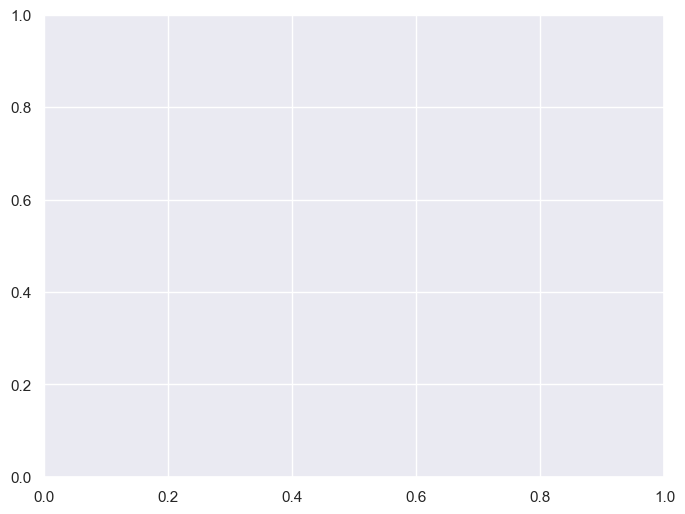

In [44]:
# Lets look at the region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1, figsize = (8,6))
ax = sns.barplot(charges.head(), charges.head().index, palette = 'Blues')

C:\Users\Dell\AppData\Local\Temp\ipykernel_16192\944799514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(charges.head().index, palette = 'Blues')


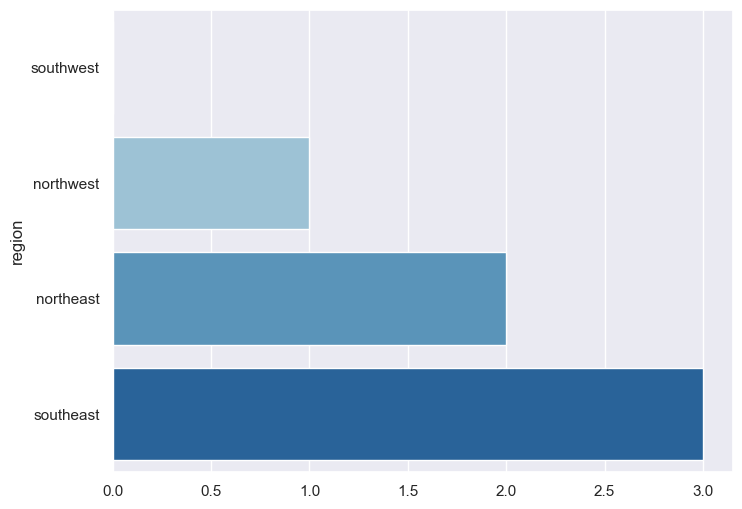

In [45]:
# Lets look at the region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1, figsize = (8,6))
ax = sns.barplot(charges.head().index, palette = 'Blues')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

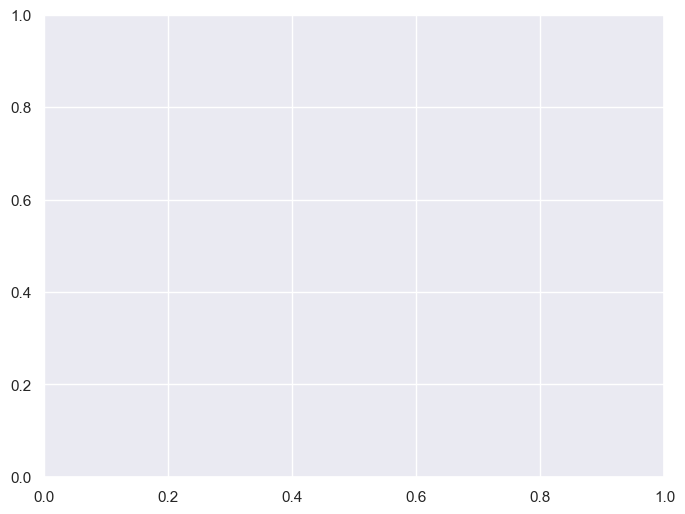

In [46]:
# Lets look at the region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1, figsize = (8,6))
ax = sns.barplot(charges.head().index, hue = 'Blues')

C:\Users\Dell\AppData\Local\Temp\ipykernel_16192\944799514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(charges.head().index, palette = 'Blues')


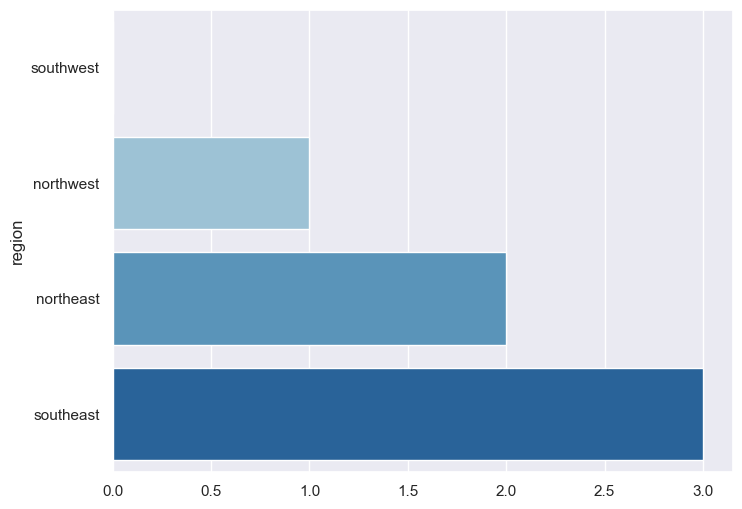

In [47]:
# Lets look at the region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1, figsize = (8,6))
ax = sns.barplot(charges.head().index, palette = 'Blues')

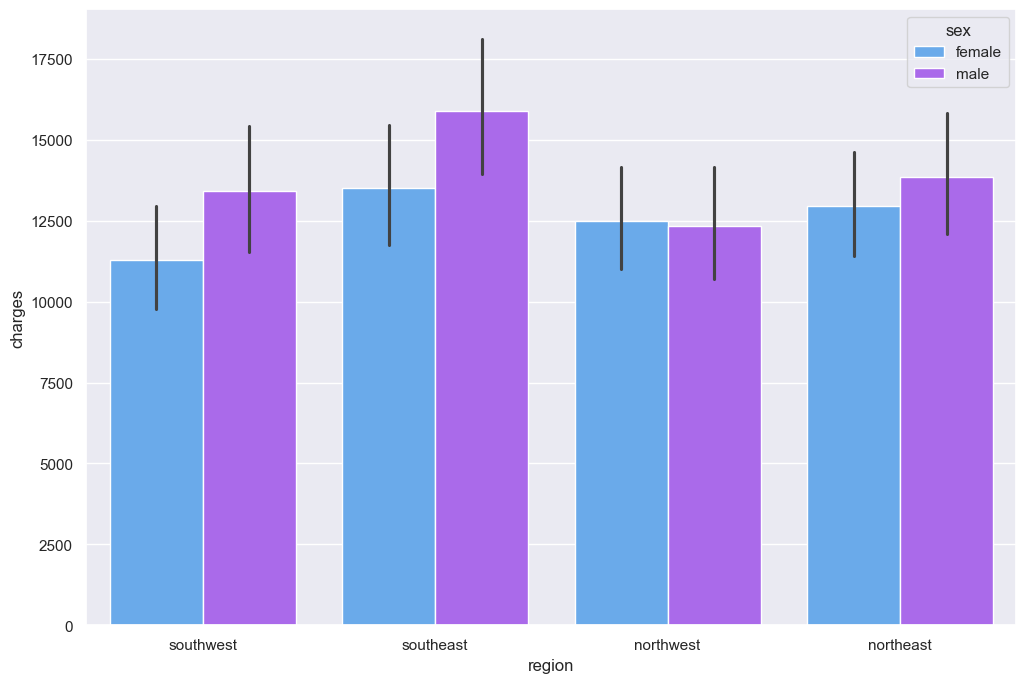

In [48]:
# Taking account into certain factors with respect to each attributes
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'cool')

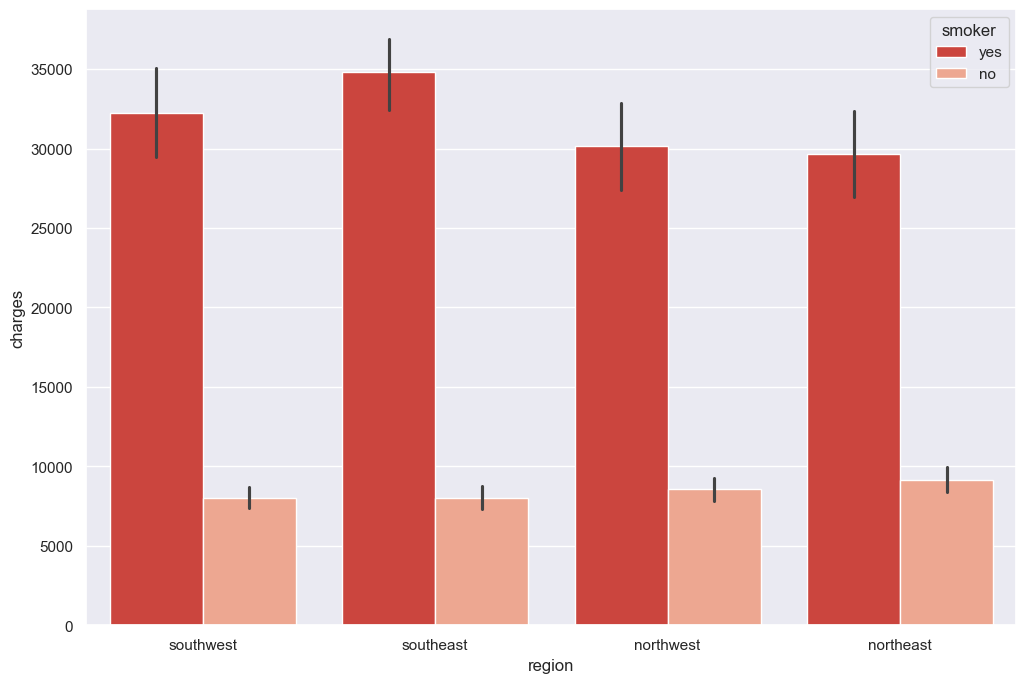

In [49]:
# taking into certain factors (smoking, charges)
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', data = df, hue = 'smoker', palette = 'Reds_r')

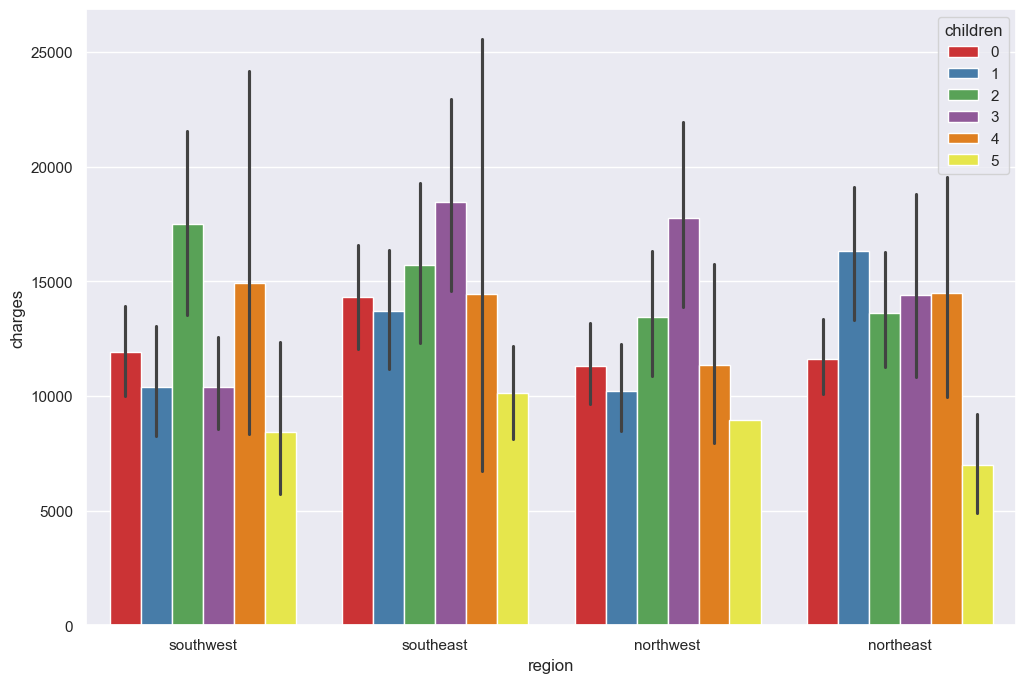

In [50]:
# Region wise charges for having children
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df, palette = 'Set1')

Text(0.5, 1.0, 'Age vs Charges')

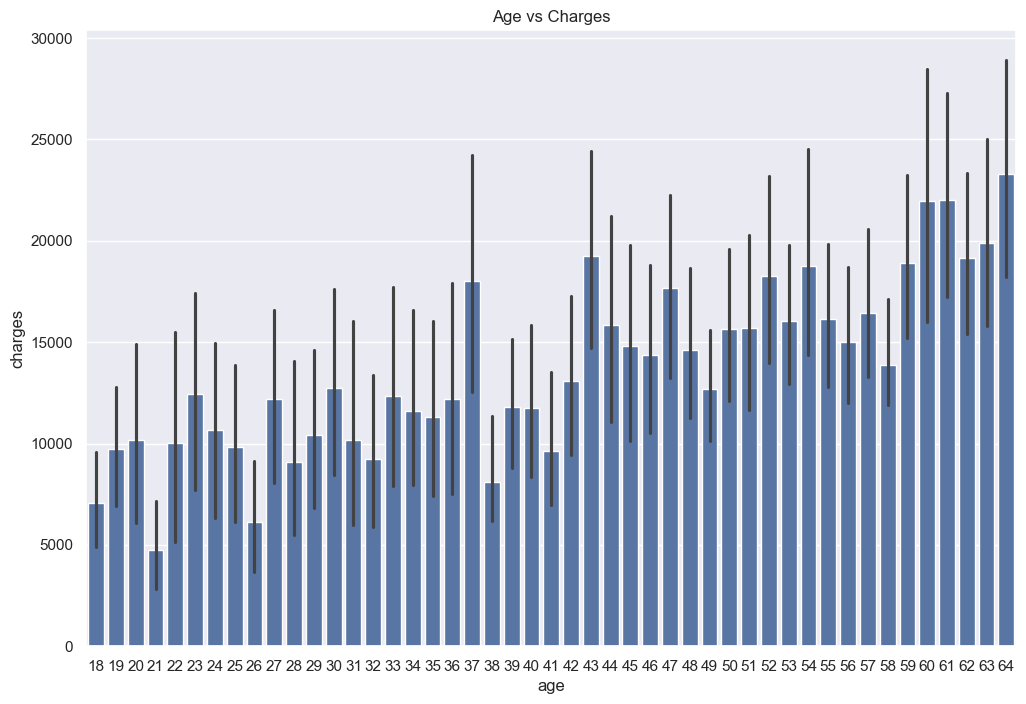

In [51]:
#Ages vs Charges
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = df)
plt.title('Age vs Charges')

In [52]:
# Sex vs charges
plt.figure(figsize = (12,8))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title("Sex vs Charges')

SyntaxError: unterminated string literal (detected at line 4) (2490666119.py, line 4)

Text(0.5, 1.0, 'Sex vs Charges')

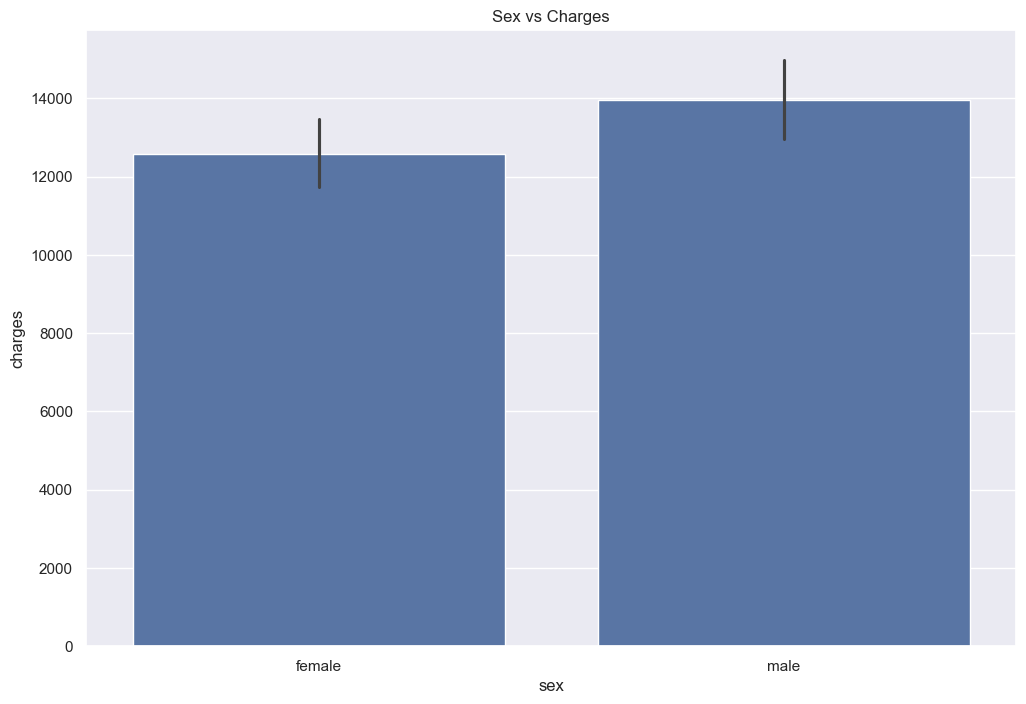

In [53]:
# Sex vs charges
plt.figure(figsize = (12,8))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title('Sex vs Charges')

In [54]:
# Smokers vs charges
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smokers', y = 'charges', data = df)
plt.title('Smokers vs Charges')

ValueError: Could not interpret value `smokers` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Smokers vs Charges')

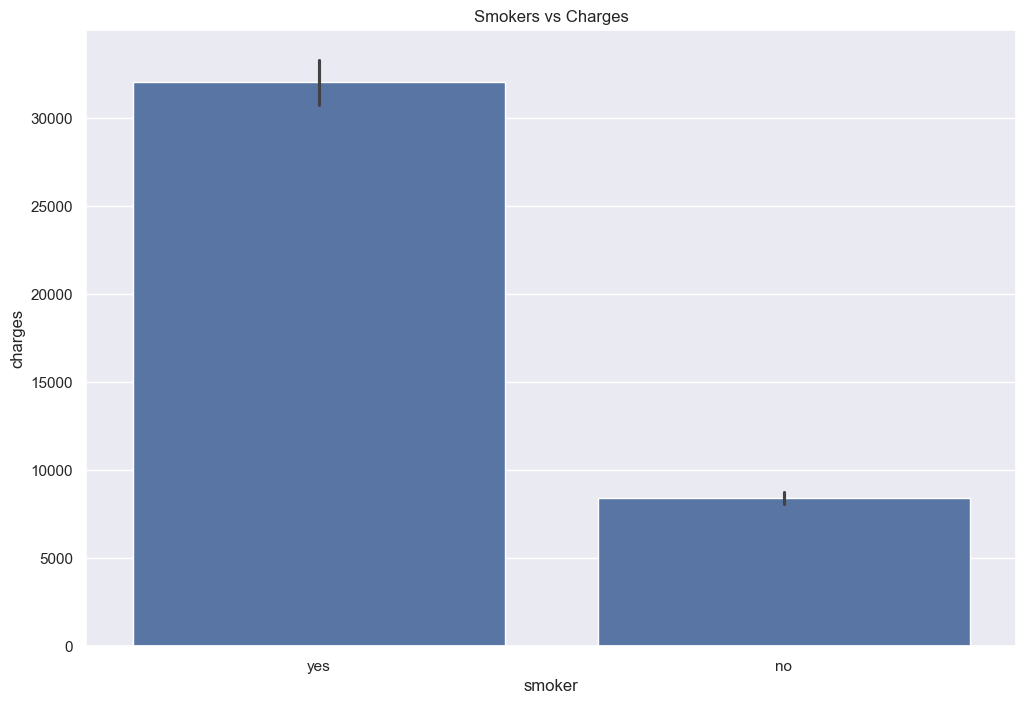

In [55]:
# Smokers vs charges
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smokers vs Charges')

Text(0.5, 1.0, 'BMI vs Charges')

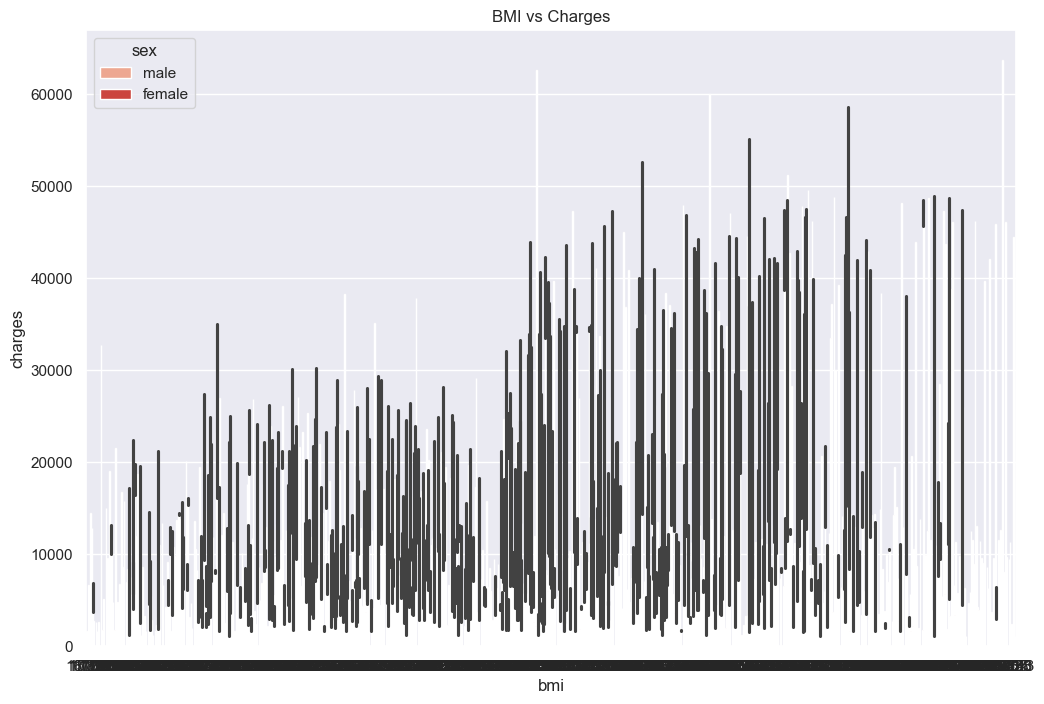

In [56]:
# BMI vs Charges
plt.figure(figsize = (12, 8))
sns.barplot(x = 'bmi', y = 'charges', hue = 'sex', data = df, palette = 'Reds')
plt.title('BMI vs Charges')

Text(0.5, 1.0, 'BMI vs Charges')

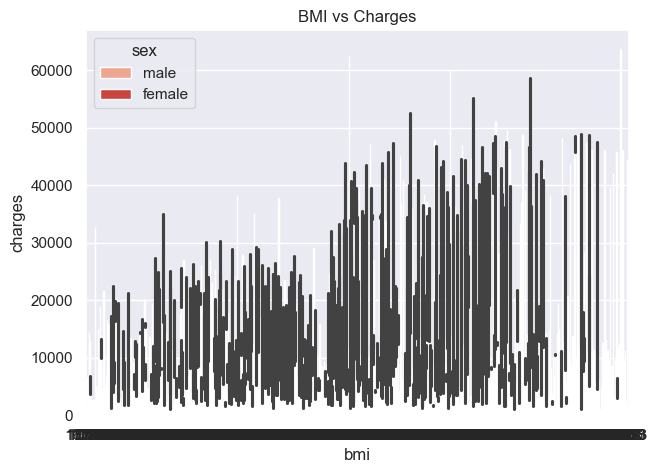

In [57]:
# BMI vs Charges
plt.figure(figsize = (7,5))
sns.barplot(x = 'bmi', y = 'charges', hue = 'sex', data = df, palette = 'Reds')
plt.title('BMI vs Charges')

NameError: name 'value_counts' is not defined

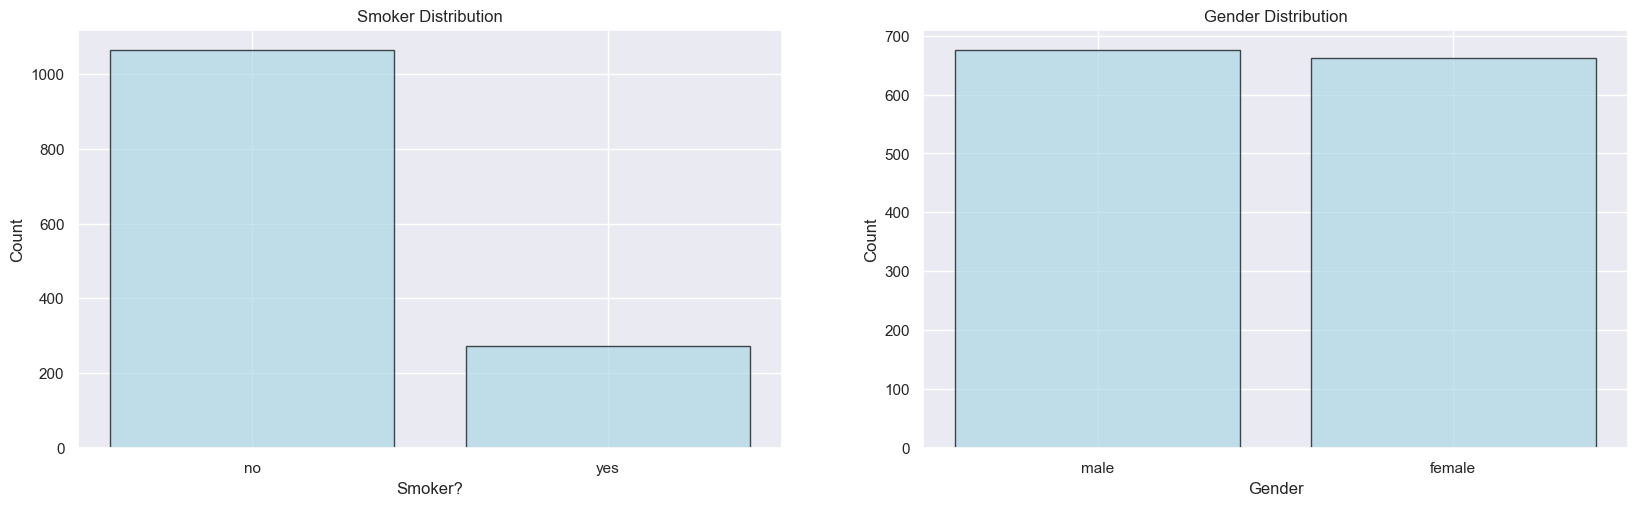

In [59]:
plt.figure(figsize = (20, 25))

x = df.smoker.value_counts().index
y = [df['smoker'].value_counts() [i] for i in x]

plt.subplot(4, 2 ,1)
plt.bar(x,y, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts() [j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1, y1, align= 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = df.region,value_counts().index
y2 = [df['region'].value_counts() [k] for k in x2]

plt.subplot(4, 2, 3)
plt.bar(x2,y2, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Region')
plt.ylable('Count')
plt.title('Region Distribution')

x3 = df.children.value_counts().index
y3 = [df['children'].value_counts() [l] for l in x3]

plt.subplot(4,2, 4)
plt.barplot(x3,y3, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('No of Children')
plt.ylabel('Count')
plt.title('Children Distirbution')

plt.show()

Text(0.5, 1.0, 'BMI vs Charges')

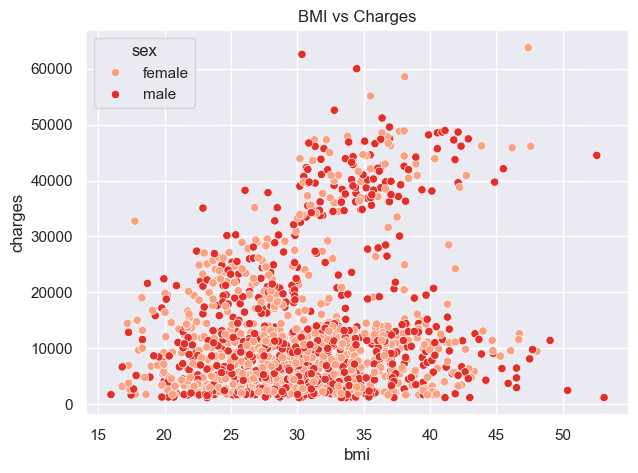

In [58]:
# BMI vs Charges
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'sex', data = df, palette = 'Reds')
plt.title('BMI vs Charges')

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

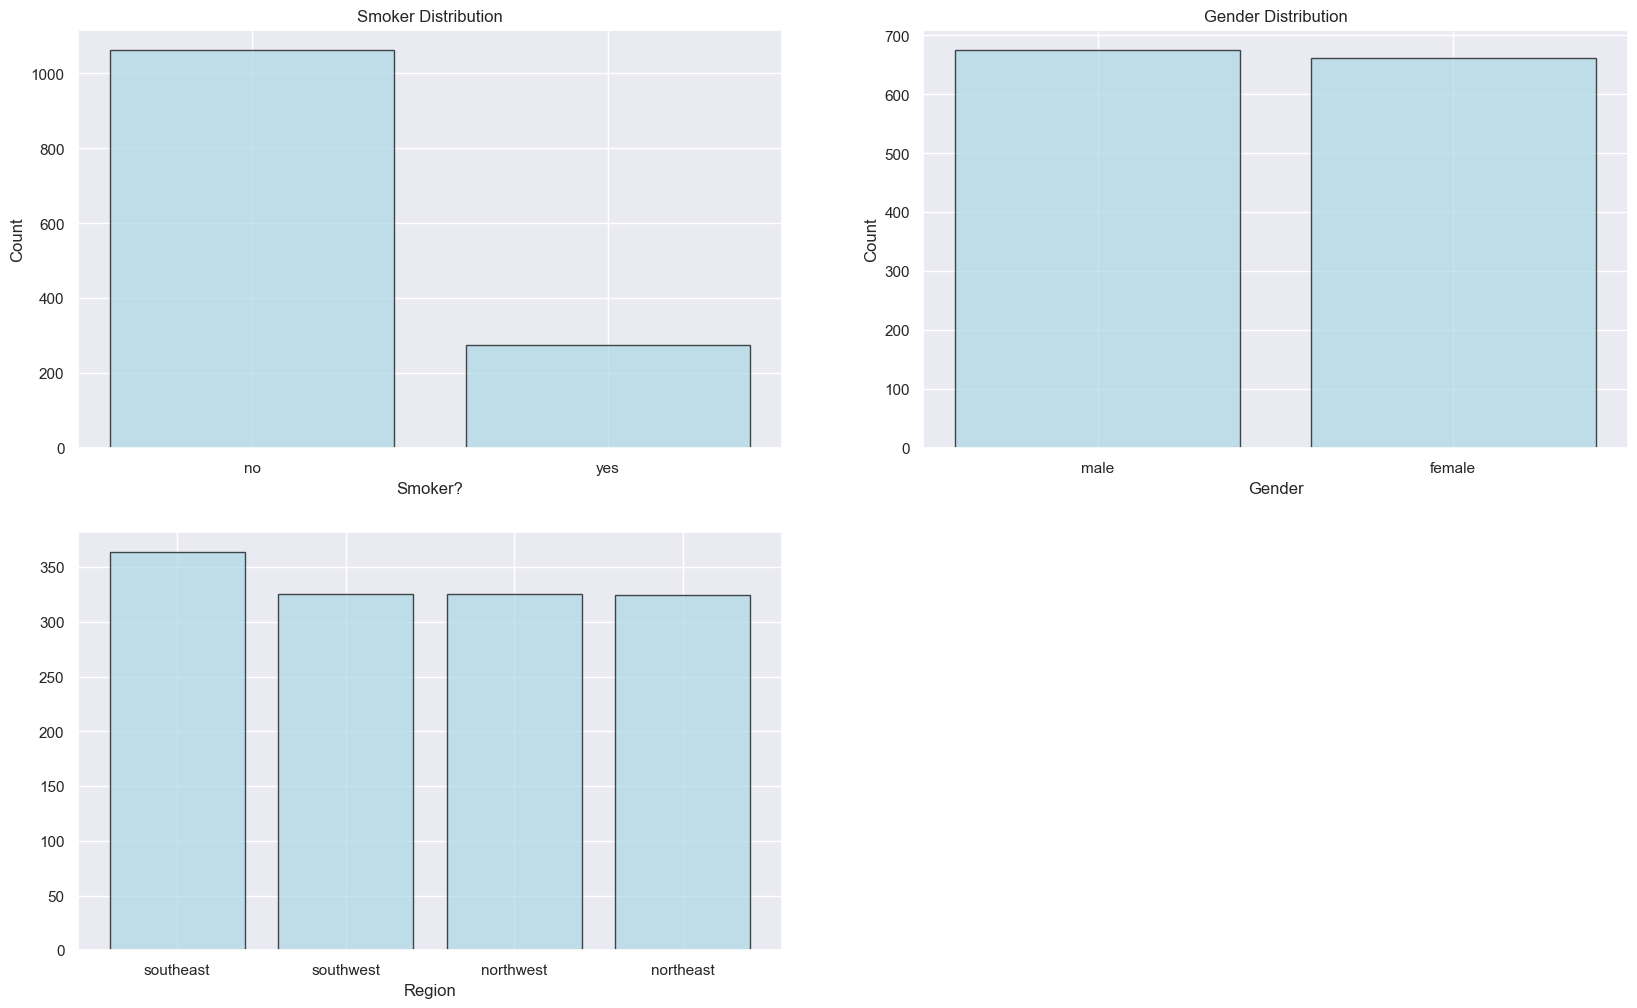

In [60]:
plt.figure(figsize = (20, 25))

x = df.smoker.value_counts().index
y = [df['smoker'].value_counts() [i] for i in x]

plt.subplot(4, 2 ,1)
plt.bar(x,y, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts() [j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1, y1, align= 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = df.region.value_counts().index
y2 = [df['region'].value_counts() [k] for k in x2]

plt.subplot(4, 2, 3)
plt.bar(x2,y2, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Region')
plt.ylable('Count')
plt.title('Region Distribution')

x3 = df.children.value_counts().index
y3 = [df['children'].value_counts() [l] for l in x3]

plt.subplot(4,2, 4)
plt.barplot(x3,y3, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('No of Children')
plt.ylabel('Count')
plt.title('Children Distirbution')

plt.show()

NameError: name 'value_counts' is not defined

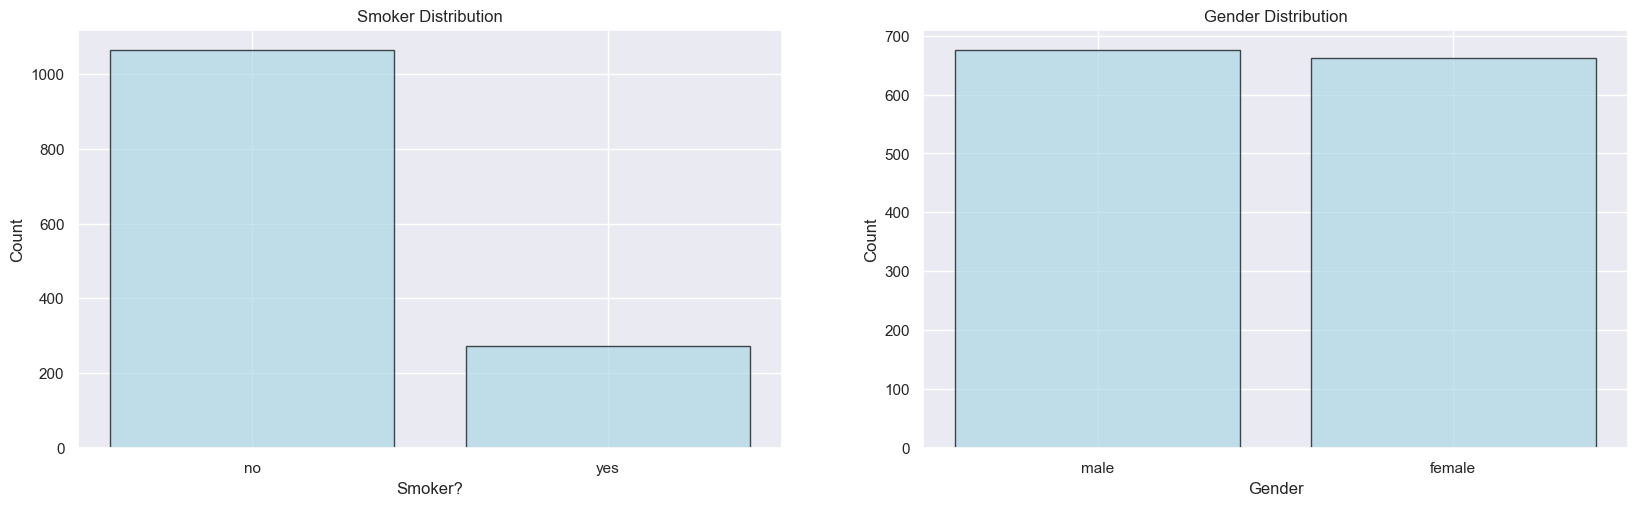

In [61]:
plt.figure(figsize = (20, 25))

x = df.smoker.value_counts().index
y = [df['smoker'].value_counts() [i] for i in x]

plt.subplot(4, 2 ,1)
plt.bar(x,y, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts() [j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1, y1, align= 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = df.region,value_counts().index
y2 = [df['region'].value_counts() [k] for k in x2]

plt.subplot(4, 2, 3)
plt.bar(x2,y2, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')

x3 = df.children.value_counts().index
y3 = [df['children'].value_counts() [l] for l in x3]

plt.subplot(4,2, 4)
plt.barplot(x3,y3, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('No of Children')
plt.ylabel('Count')
plt.title('Children Distirbution')

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

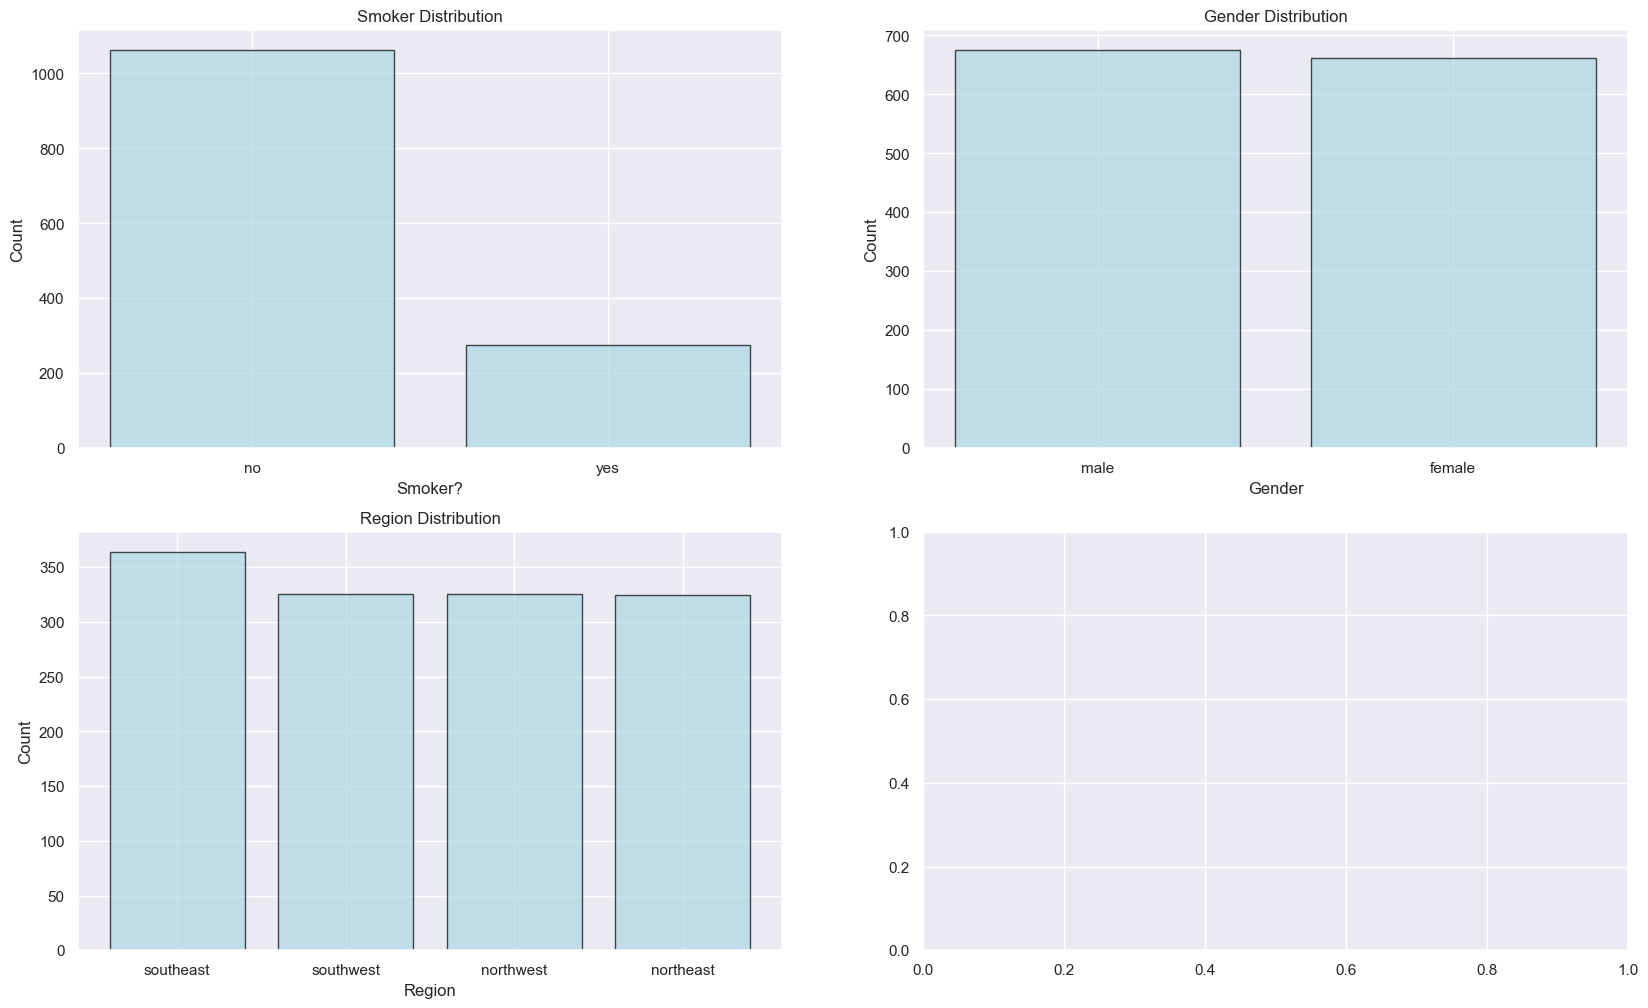

In [62]:
plt.figure(figsize = (20, 25))

x = df.smoker.value_counts().index
y = [df['smoker'].value_counts() [i] for i in x]

plt.subplot(4, 2 ,1)
plt.bar(x,y, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts() [j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1, y1, align= 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = df.region.value_counts().index
y2 = [df['region'].value_counts() [k] for k in x2]

plt.subplot(4, 2, 3)
plt.bar(x2,y2, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')

x3 = df.children.value_counts().index
y3 = [df['children'].value_counts() [l] for l in x3]

plt.subplot(4,2, 4)
plt.barplot(x3,y3, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('No of Children')
plt.ylabel('Count')
plt.title('Children Distirbution')

plt.show()

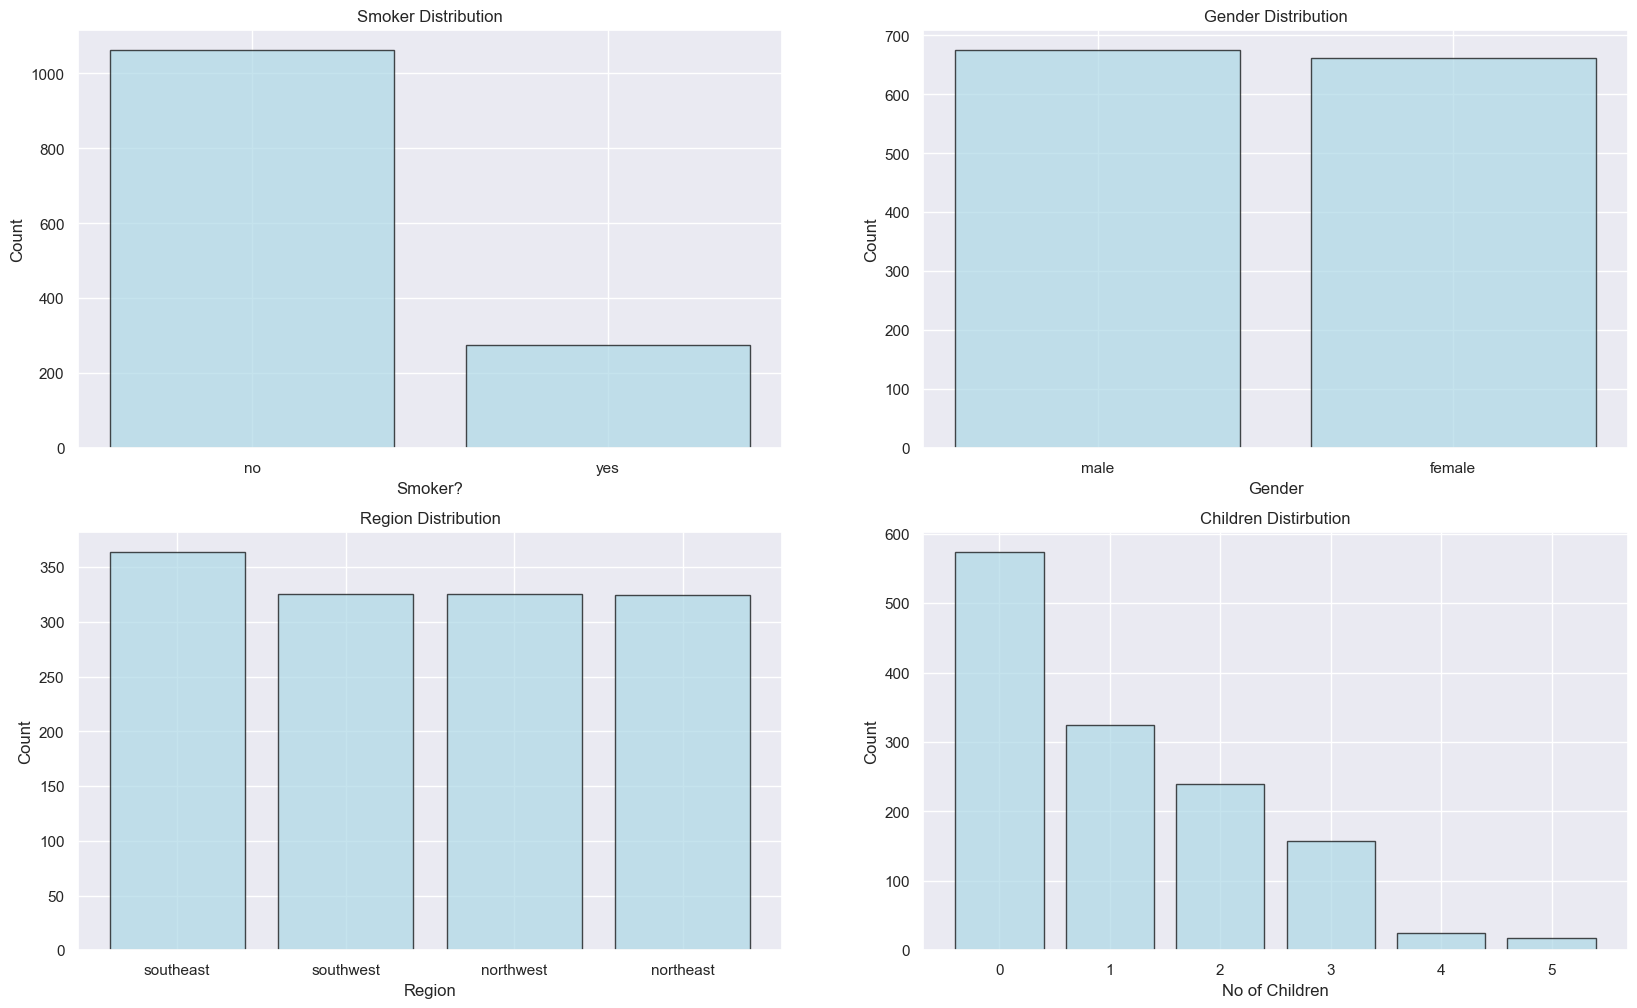

In [63]:
plt.figure(figsize = (20, 25))

x = df.smoker.value_counts().index
y = [df['smoker'].value_counts() [i] for i in x]

plt.subplot(4, 2 ,1)
plt.bar(x,y, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts() [j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1, y1, align= 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = df.region.value_counts().index
y2 = [df['region'].value_counts() [k] for k in x2]

plt.subplot(4, 2, 3)
plt.bar(x2,y2, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')

x3 = df.children.value_counts().index
y3 = [df['children'].value_counts() [l] for l in x3]

plt.subplot(4,2, 4)
plt.bar(x3,y3, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('No of Children')
plt.ylabel('Count')
plt.title('Children Distirbution')

plt.show()

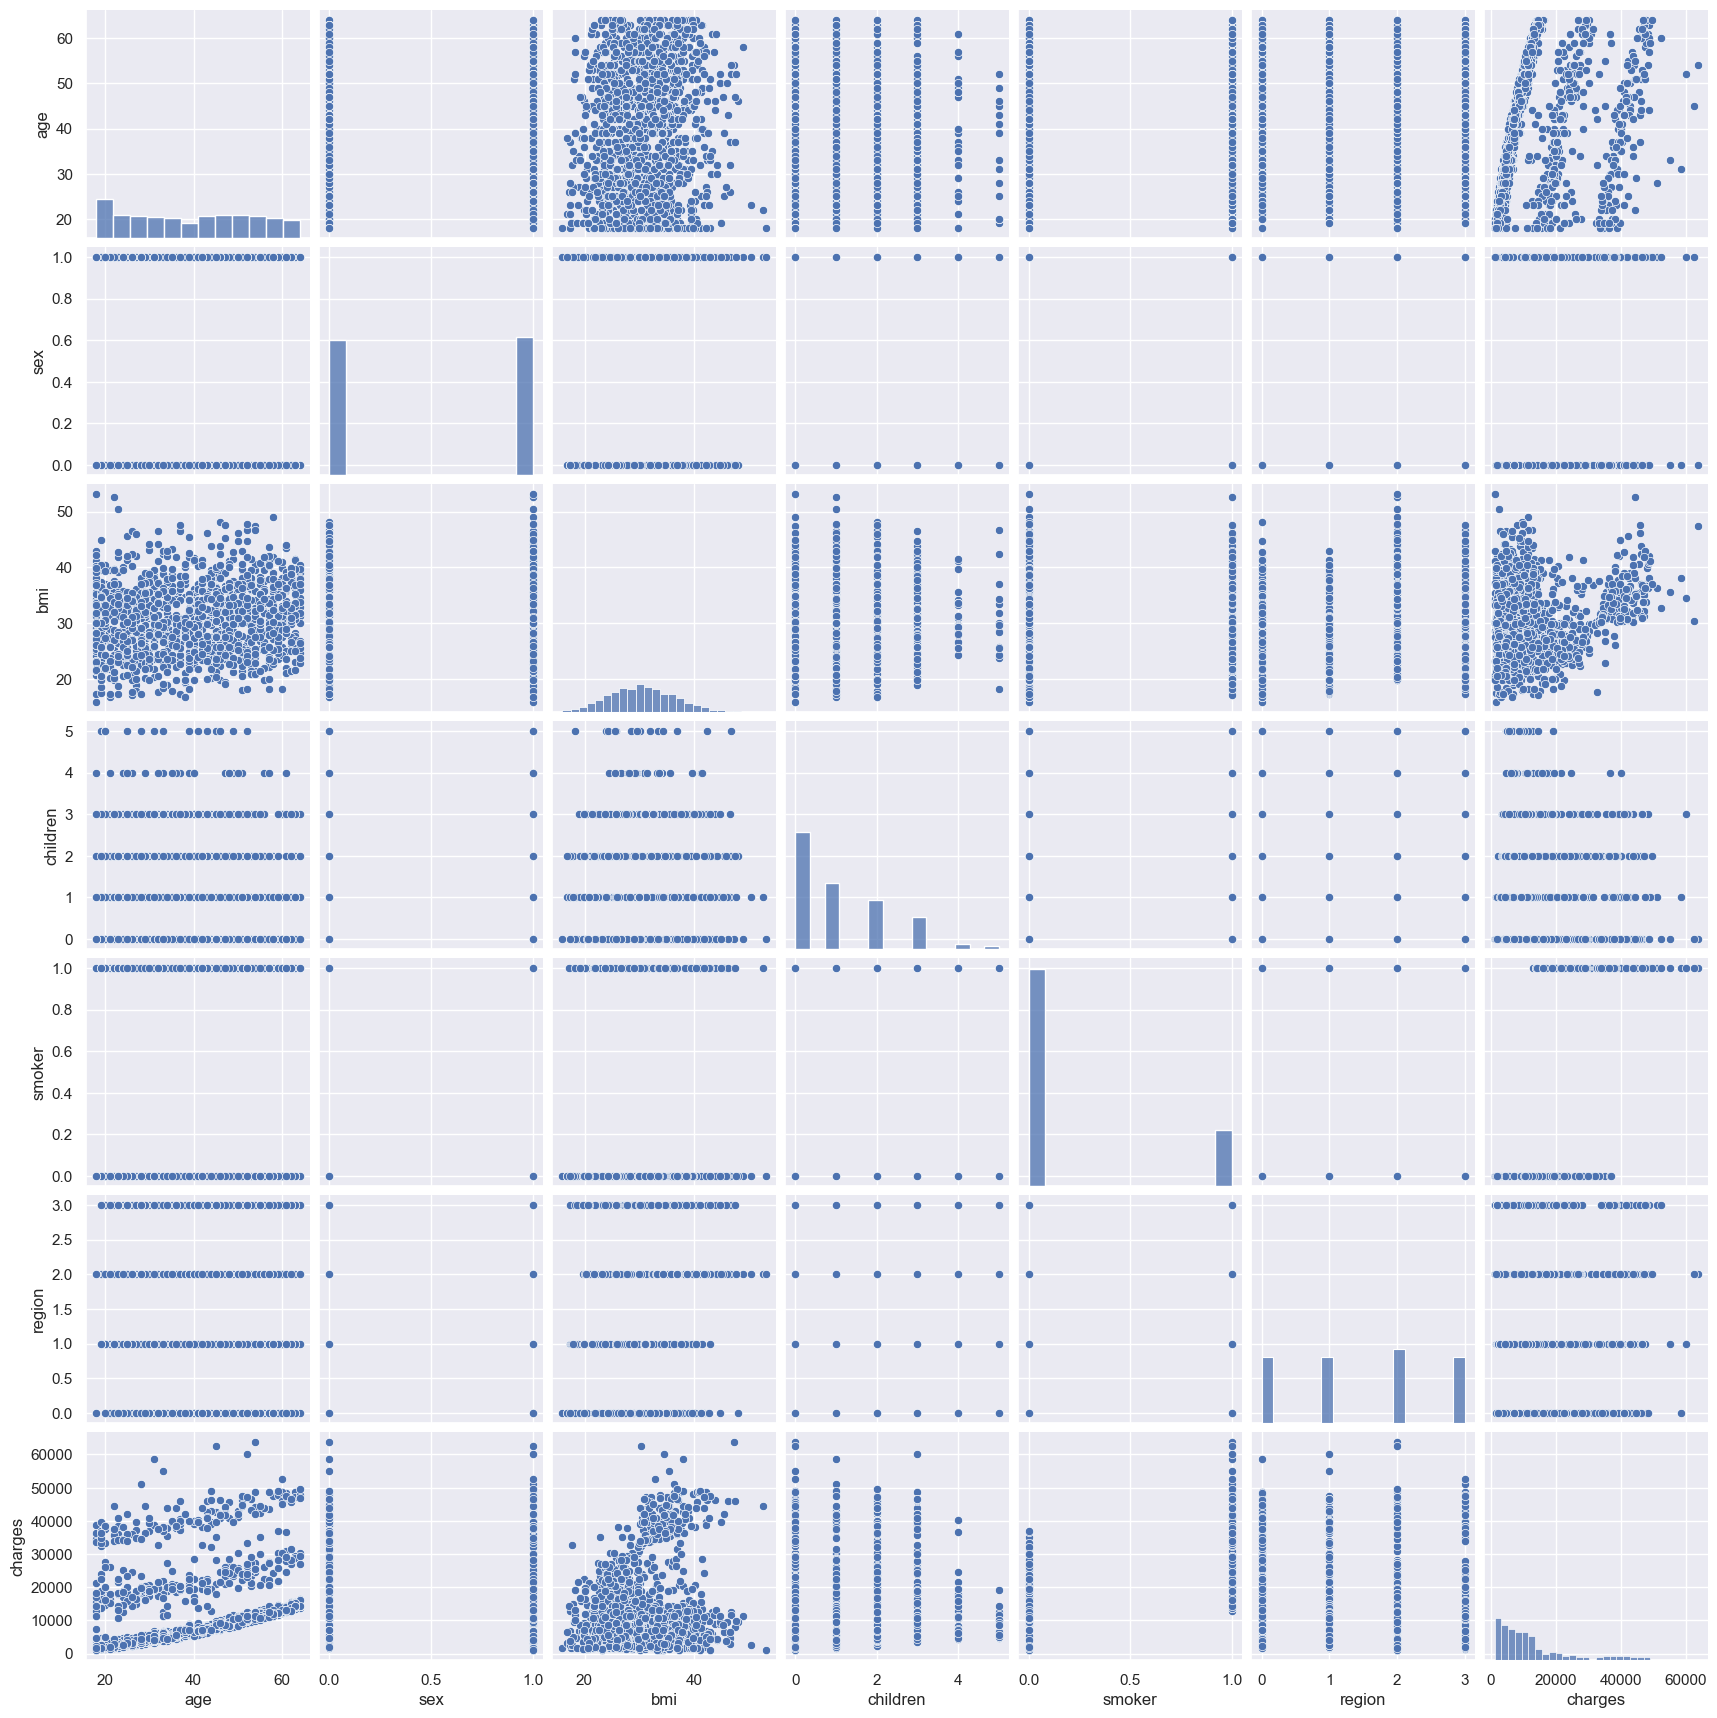

In [64]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().
                                                                                                  fit_transform)
sns.pairplot(df_encoded) #pairplot
plt.show()

\\?\C:\Users\Dell\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

\\?\C:\Users\Dell\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


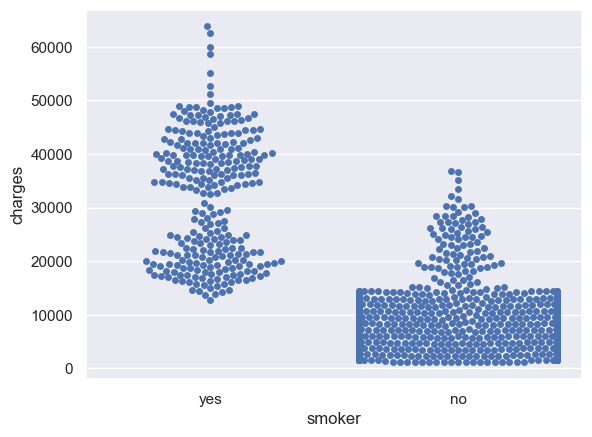

In [65]:
# A swarmplot is another way of plotting the distribution of an attribute or the joint distribution of a couple of attributes

sns.swarmplot(x = df['smoker'],
              y = df['charges'])